<a href="https://akademie.datamics.com/kursliste/">![title](bg_datamics_top.png)</a>

<center><em>© Datamics</em></center><br><center><em>Besuche uns für mehr Informationen auf <a href='https://akademie.datamics.com/kursliste/'>www.akademie.datamics.com</a></em></center>

# Sharpe Quotient und Portfoliowerte

In [1]:
import pandas as pd

In [2]:
import quandl

## Ein Portfolio erstellen

In [3]:
start = pd.to_datetime('2012-01-01')
end = pd.to_datetime('2017-01-01')

In [4]:
quandl.ApiConfig.api_key = "YovE679j_DPTFFAWusBD"

In [5]:
# Wir erfassen ein paar Technologie Aktien für unser Portfolio
#aapl = quandl.get('WIKI/AAPL.11',start_date=start,end_date=end)
#cisco = quandl.get('WIKI/CSCO.11',start_date=start,end_date=end)
#ibm = quandl.get('WIKI/IBM.11',start_date=start,end_date=end)
#amzn = quandl.get('WIKI/AMZN.11',start_date=start,end_date=end)

In [7]:
# Alternative
aapl = pd.read_csv('AAPL_CLOSE',index_col='Date',parse_dates=True)
cisco = pd.read_csv('CISCO_CLOSE',index_col='Date',parse_dates=True)
ibm = pd.read_csv('IBM_CLOSE',index_col='Date',parse_dates=True)
amzn = pd.read_csv('AMZN_CLOSE',index_col='Date',parse_dates=True)

## Preise normalisieren

Das ist dasselbe wie die gesamten täglichen Renditewerte (cumulative daily returns).

In [11]:
# Beispiel
aapl.iloc[0]['Adj. Close']

52.848786580038

In [12]:
for stock_df in (aapl,cisco,ibm,amzn):
    stock_df['Normed Return'] = stock_df['Adj. Close']/stock_df.iloc[0]['Adj. Close']

In [15]:
aapl.head()

,Adj. Close,Normed Return
Date,,
2012-01-03,52.848787,1.000000
2012-01-04,53.132802,1.005374
2012-01-05,53.722681,1.016536
2012-01-06,54.284287,1.027162
2012-01-09,54.198183,1.025533


In [16]:
aapl.tail()

,Adj. Close,Normed Return
Date,,
2016-12-23,115.080808,2.177549
2016-12-27,115.811668,2.191378
2016-12-28,115.317843,2.182034
2016-12-29,115.288214,2.181473
2016-12-30,114.389454,2.164467


## Allokationen

Mal angenommen, wir hätten die folgenden Allokationen für unser gesamtes Portfolio:

* 30% in Apple
* 20% in Google/Alphabet
* 40% in Amazon
* 10% in IBM

Reflektieren wir diese Werte, indem wir unsere normierte Rendite (Normed Return) mit unseren Allokationen multiplizieren.

In [17]:
for stock_df,allo in zip([aapl,cisco,ibm,amzn],[.3,.2,.4,.1]):
    stock_df['Allocation'] = stock_df['Normed Return']*allo

In [19]:
# See the returns to now weighted to the overall portfolio
aapl.head()

,Adj. Close,Normed Return,Allocation
Date,,,
2012-01-03,52.848787,1.000000,0.300000
2012-01-04,53.132802,1.005374,0.301612
2012-01-05,53.722681,1.016536,0.304961
2012-01-06,54.284287,1.027162,0.308149
2012-01-09,54.198183,1.025533,0.307660


## Investition (Investment)

Nehmen wir an, wir würden eine Millionen Dollar in dieses Portfolio investieren.

In [20]:
for stock_df in [aapl,cisco,ibm,amzn]:
    stock_df['Position Values'] = stock_df['Allocation']*1000000

## Gesamter Portfoliowert  (Total Portfolio Value)

In [39]:
# Bind it to a single DF and assign colnames
portfolio_val = pd.concat([aapl['Position Values'],cisco['Position Values'],ibm['Position Values'],amzn['Position Values']],axis=1)
portfolio_val.columns = ['AAPL Pos','CISCO Pos','IBM Pos','AMZN Pos']

In [40]:
portfolio_val.head()

,AAPL Pos,CISCO Pos,IBM Pos,AMZN Pos
Date,,,,
2012-01-03,300000.000000,200000.000000,400000.000000,100000.000000
2012-01-04,301612.236461,203864.734300,398368.223296,99150.980283
2012-01-05,304960.727573,203113.258186,396478.797638,99206.836843
2012-01-06,308148.724558,202361.782072,391926.999463,101999.664861
2012-01-09,307659.946988,203650.026838,389887.278583,99737.474166


In [41]:
# Add total performance   
portfolio_val['Total Pos'] = portfolio_val.sum(axis=1)

In [42]:
portfolio_val.head()

,AAPL Pos,CISCO Pos,IBM Pos,AMZN Pos,Total Pos
Date,,,,,
2012-01-03,300000.000000,200000.000000,400000.000000,100000.000000,1.000000e+06
2012-01-04,301612.236461,203864.734300,398368.223296,99150.980283,1.002996e+06
2012-01-05,304960.727573,203113.258186,396478.797638,99206.836843,1.003760e+06
2012-01-06,308148.724558,202361.782072,391926.999463,101999.664861,1.004437e+06
2012-01-09,307659.946988,203650.026838,389887.278583,99737.474166,1.000935e+06


In [43]:
import matplotlib.pyplot as plt
%matplotlib inline

Text(0.5, 1.0, 'Total Portfolio Value')

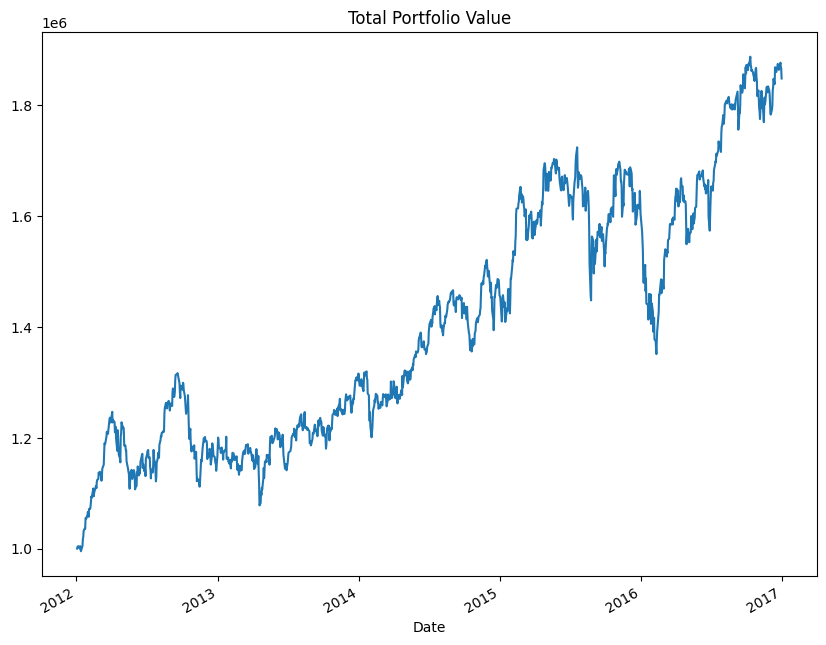

In [44]:
portfolio_val['Total Pos'].plot(figsize=(10,8))
plt.title('Total Portfolio Value')

<AxesSubplot: xlabel='Date'>

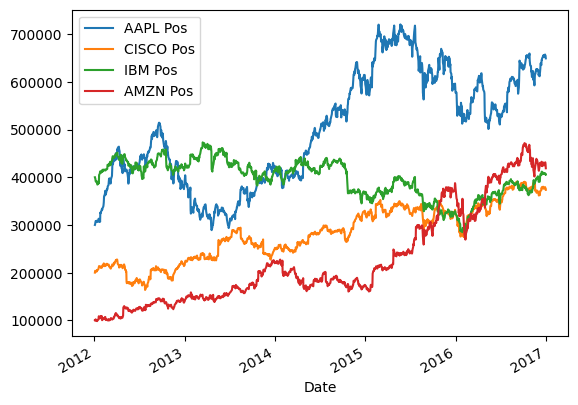

In [45]:
portfolio_val.drop('Total Pos',axis=1).plot(kind='line')

In [46]:
portfolio_val.tail()

,AAPL Pos,CISCO Pos,IBM Pos,AMZN Pos,Total Pos
Date,,,,,
2016-12-23,653264.617079,377469.015679,407359.955612,424839.412389,1.862933e+06
2016-12-27,657413.396830,379323.596496,408410.671112,430877.506563,1.876025e+06
2016-12-28,654610.167268,376108.989746,406089.322915,431285.259454,1.868094e+06
2016-12-29,654441.973495,376603.544631,407091.167926,427386.471541,1.865523e+06
2016-12-30,649340.095692,373636.215323,405600.618032,418851.589119,1.847429e+06


# Portfolio Statistiken
### Tägliche Rendite

In [49]:
portfolio_val['Daily Return'] = portfolio_val['Total Pos'].pct_change(1)

In [51]:
portfolio_val.head()

,AAPL Pos,CISCO Pos,IBM Pos,AMZN Pos,Total Pos,Daily Return
Date,,,,,,
2012-01-03,300000.000000,200000.000000,400000.000000,100000.000000,1.000000e+06,NaN
2012-01-04,301612.236461,203864.734300,398368.223296,99150.980283,1.002996e+06,0.002996
2012-01-05,304960.727573,203113.258186,396478.797638,99206.836843,1.003760e+06,0.000761
2012-01-06,308148.724558,202361.782072,391926.999463,101999.664861,1.004437e+06,0.000675
2012-01-09,307659.946988,203650.026838,389887.278583,99737.474166,1.000935e+06,-0.003487


### Gesamtrendite

In [52]:
cum_ret = 100 * (portfolio_val['Total Pos'][-1]/portfolio_val['Total Pos'][0] -1 )
print('Our return {} was percent!'.format(cum_ret))

Our return 84.74285181665545 was percent!


### Durchschnittliche tägliche Rendite

In [53]:
portfolio_val['Daily Return'].mean()

0.0005442330716215244

### Standardabweichung tägliche Rendite

In [55]:
portfolio_val['Daily Return'].std()

0.010568287769161725

<AxesSubplot: ylabel='Density'>

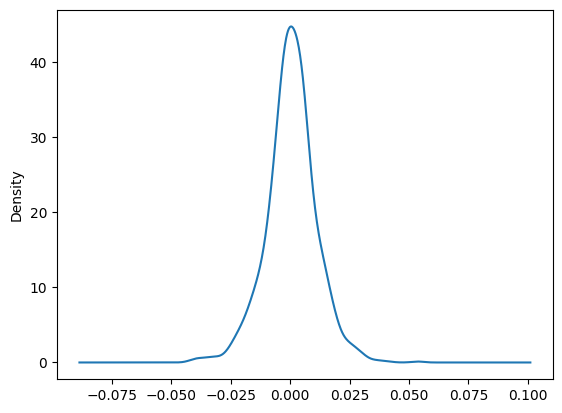

In [56]:
portfolio_val['Daily Return'].plot(kind='kde')

# Sharpe Quotient (Sharpe Ratio)

Der Sharpe Quotient ist ein Maß zur Berechnung von Risiko-angepasster Rendite. Dieser Quotient ist Industriestandard für solche Berechnungen geworden. 

Sharpe Quotient = (Durschnittliche Rendite des Portfolios - risikofreie Quote) / Standardabweichung der Rendite des Portfolios

Der originale Sharpe Quotient

Jährlicher Sharpe Quotient = K-Wert * SQ

K-Werte für verschiedene Probenhäufigkeiten:

* Täglich = sqrt(252)
* Wöchentlich= sqrt(52)
* Monatlich = sqrt(12)

In der EU verwendet man eine sehr niedrige risikofreie Quote (die Quote, die Du bekommen würdest, wenn du Dein Geld einfach in einer Bank lassen würdest, ist in der EU zur Zeit sehr niedrig, sagen wir ~ 0% Zinsen). Falls Du in einem anderen Land mit höheren Quoten für deine Handelswährung lebst, kannst Du diesen Trick benutzen, um eine jährliche Quote in eine tägliche Quote umzuwandeln:

tägliche_quote = ((1.0 + jährliche_quote)**(1/252))-1

Andere Werte, die Leute benutzen, sind Sachen wie 3-monatige Staatsanleihen oder [LIBOR](http://www.investopedia.com/terms/l/libor.asp) / EURIBOR.

Lies mehr dazu: [Sharpe Quotient](http://www.investopedia.com/terms/s/sharperatio)

In [57]:
SR = portfolio_val['Daily Return'].mean()/portfolio_val['Daily Return'].std()

In [58]:
SR

0.05149680662648089

In [59]:
ASR = (252**0.5)*SR

In [60]:
ASR

0.817486461885909

In [61]:
portfolio_val['Daily Return'].std()

0.010568287769161725

In [62]:
portfolio_val['Daily Return'].mean()

0.0005442330716215244

<AxesSubplot: ylabel='Density'>

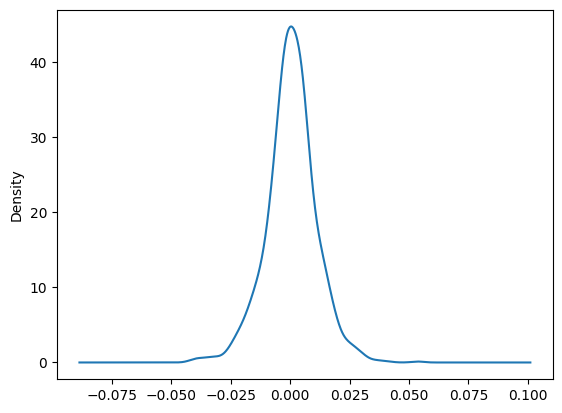

In [63]:
portfolio_val['Daily Return'].plot(kind='kde')

<AxesSubplot: ylabel='Density'>

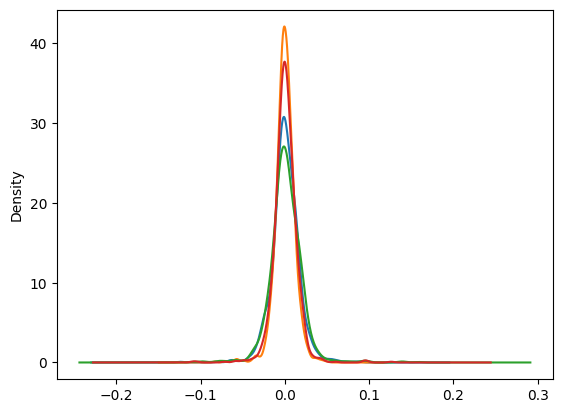

In [64]:
aapl['Adj. Close'].pct_change(1).plot(kind='kde')
ibm['Adj. Close'].pct_change(1).plot(kind='kde')
amzn['Adj. Close'].pct_change(1).plot(kind='kde')
cisco['Adj. Close'].pct_change(1).plot(kind='kde')

In [65]:
import numpy as np
np.sqrt(252)* (np.mean(.001-0.0002)/.001)

12.699606293110037

# Super gemacht!